In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [25]:
dataset = pd.read_csv('/content/sales_data_with_discounts.csv')

In [26]:
# Assign the dataset to the variable df
df = dataset  # Assuming you intend 'df' to refer to the dataset

In [27]:
numerical_columns = dataset.select_dtypes(include=['number'])


In [28]:
# Mean
mean_values = numerical_columns.mean()
print("Mean:\n", mean_values)

# Median
median_values = numerical_columns.median()
print("\nMedian:\n", median_values)

# Mode (handling potential multiple modes)
mode_values = numerical_columns.mode().iloc[0] # taking the first mode in case of multiple modes
print("\nMode:\n", mode_values)

# Standard Deviation
std_dev_values = numerical_columns.std()
print("\nStandard Deviation:\n", std_dev_values)

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


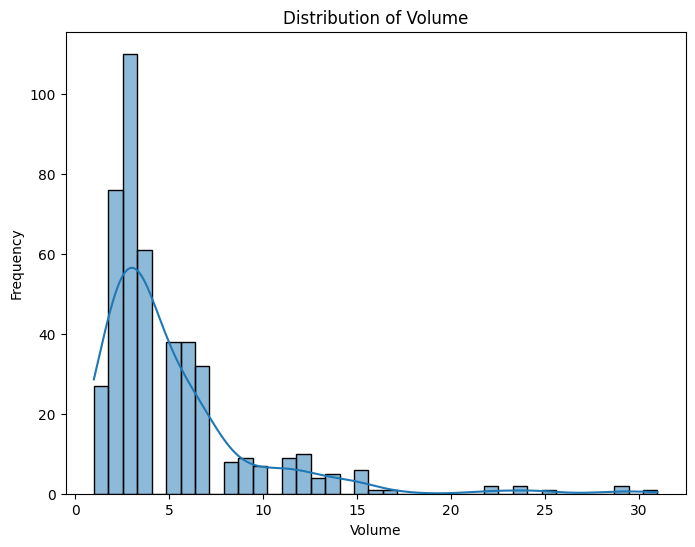

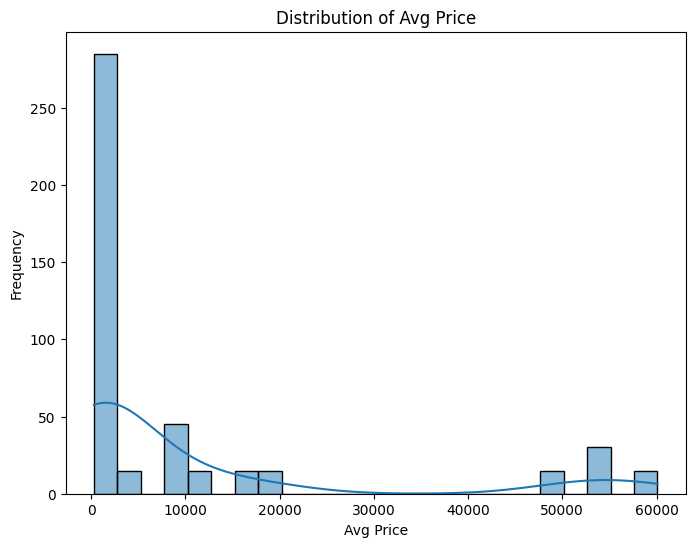

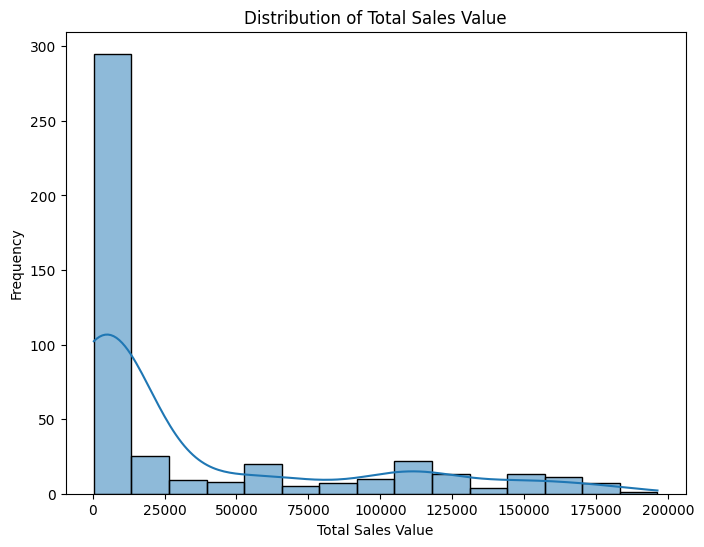

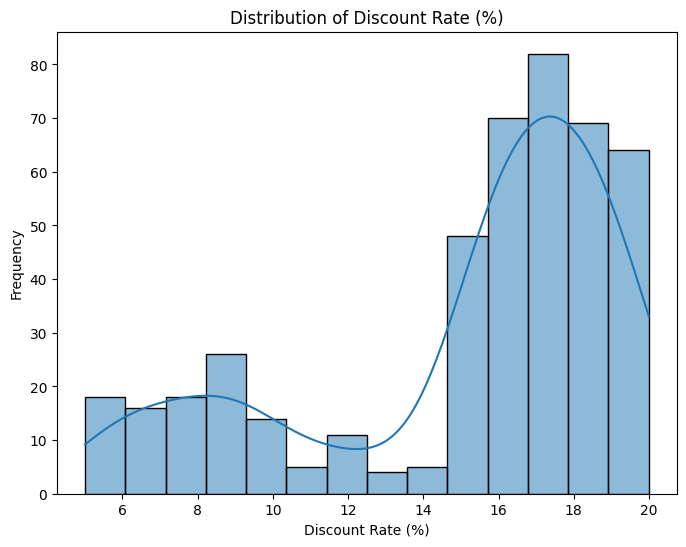

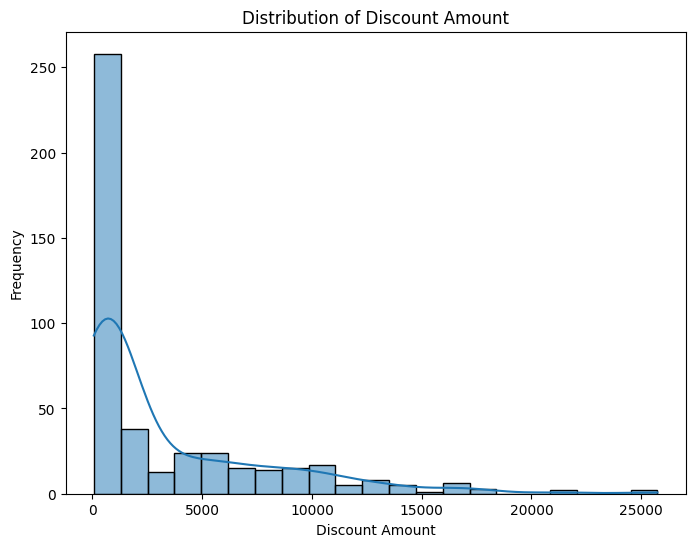

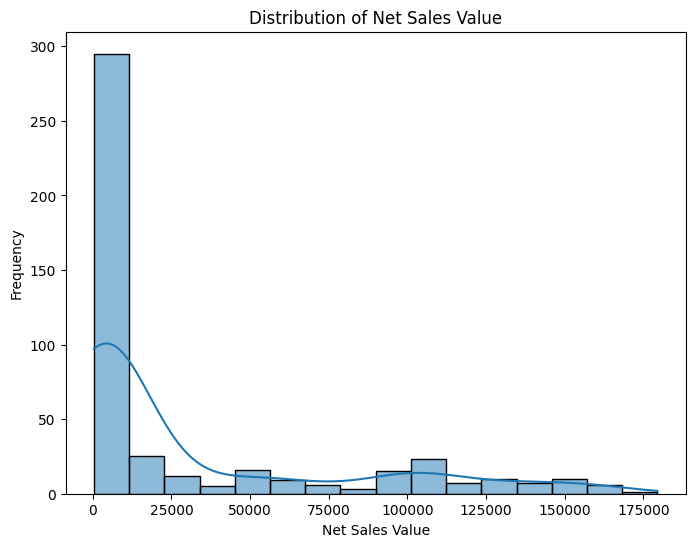

In [29]:
# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)  # Include KDE for better visualization
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

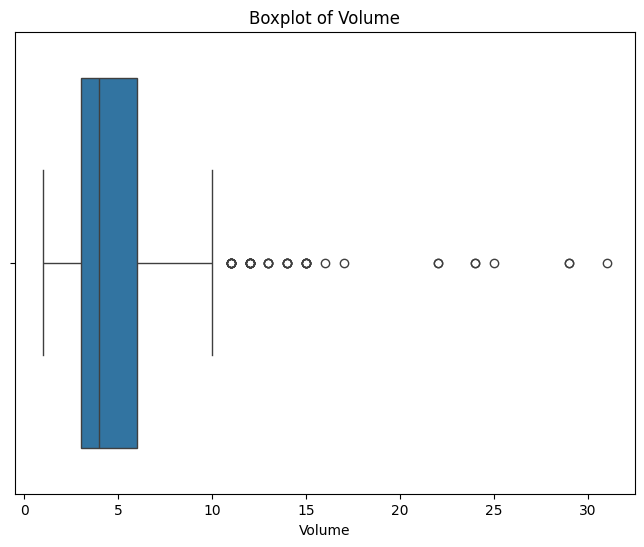

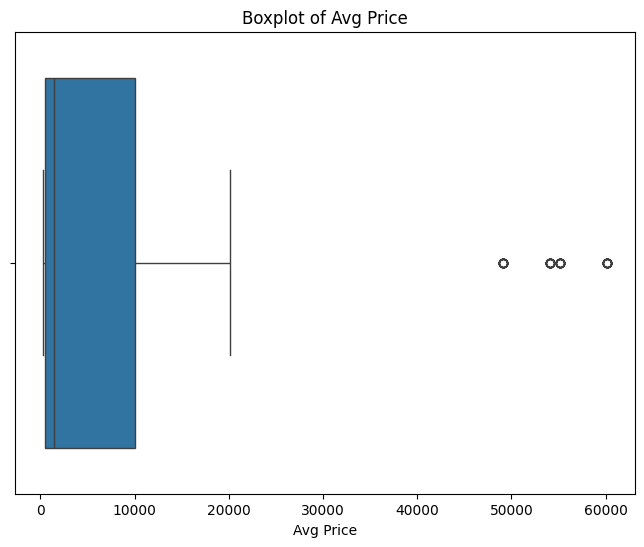

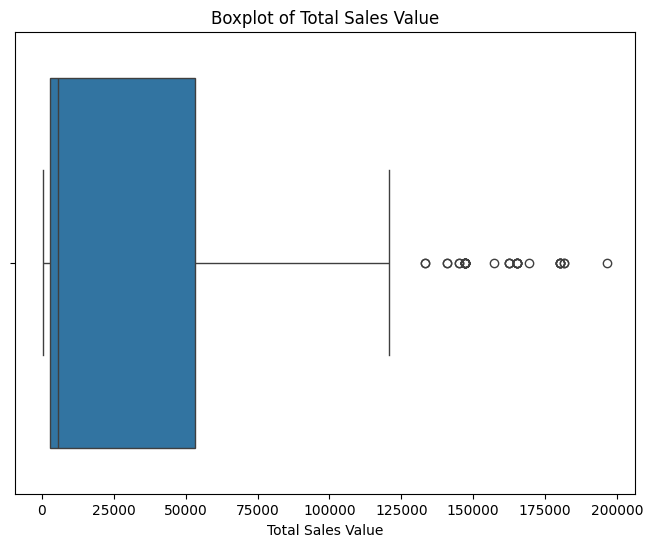

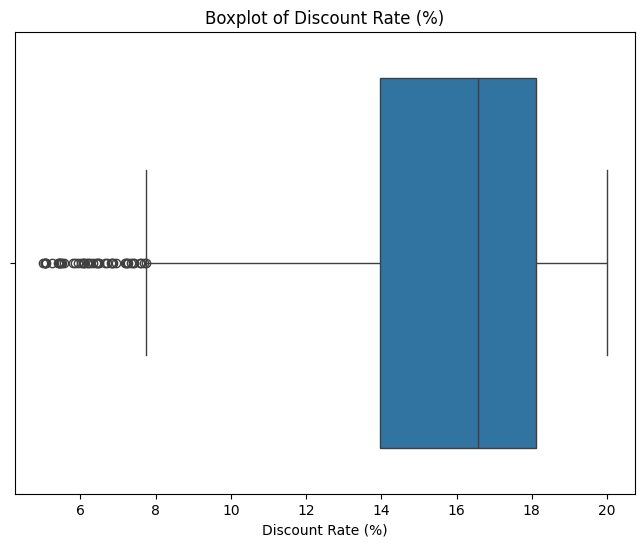

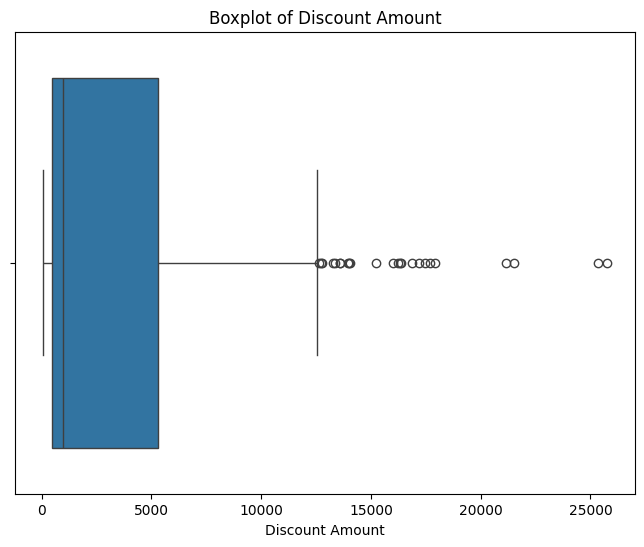

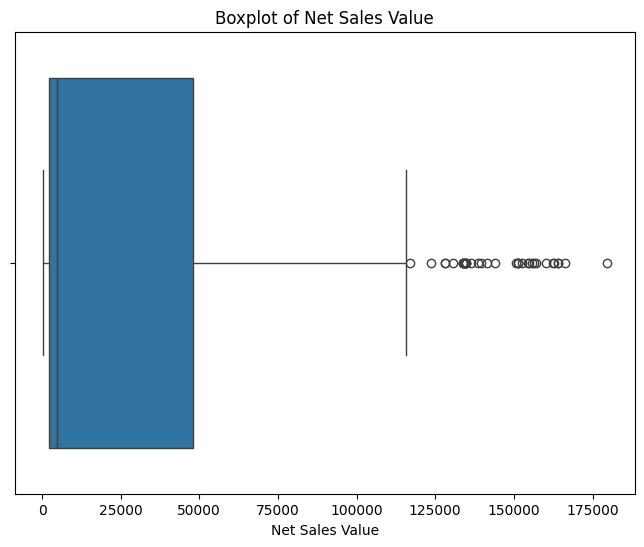

In [30]:
# Create boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [31]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])


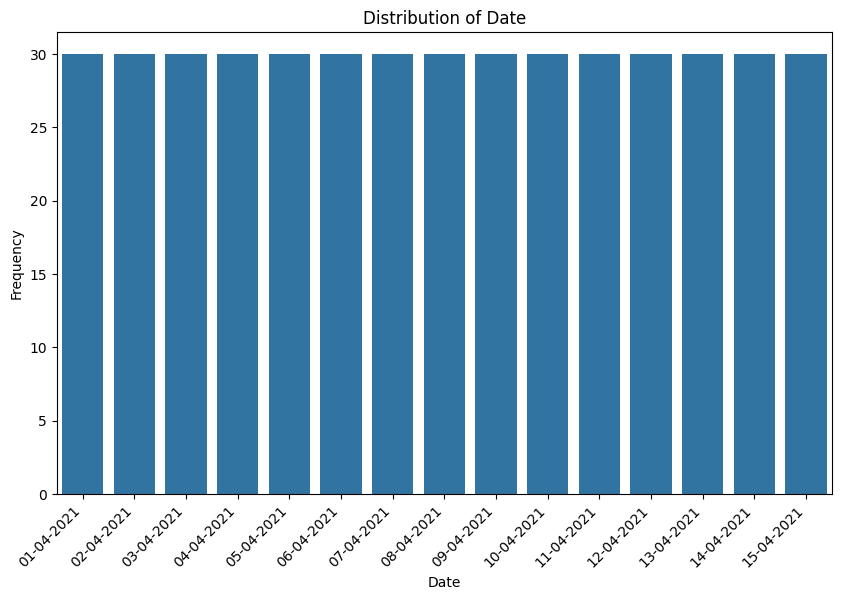

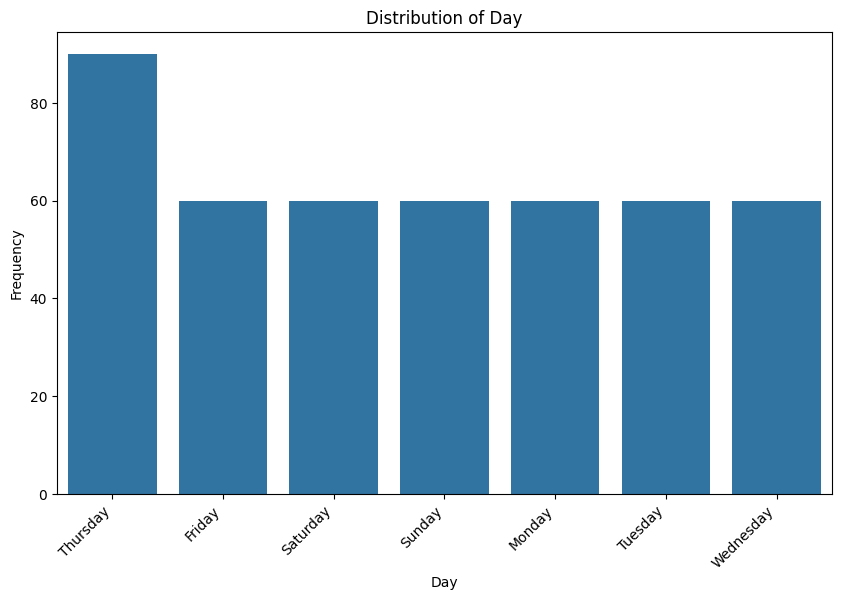

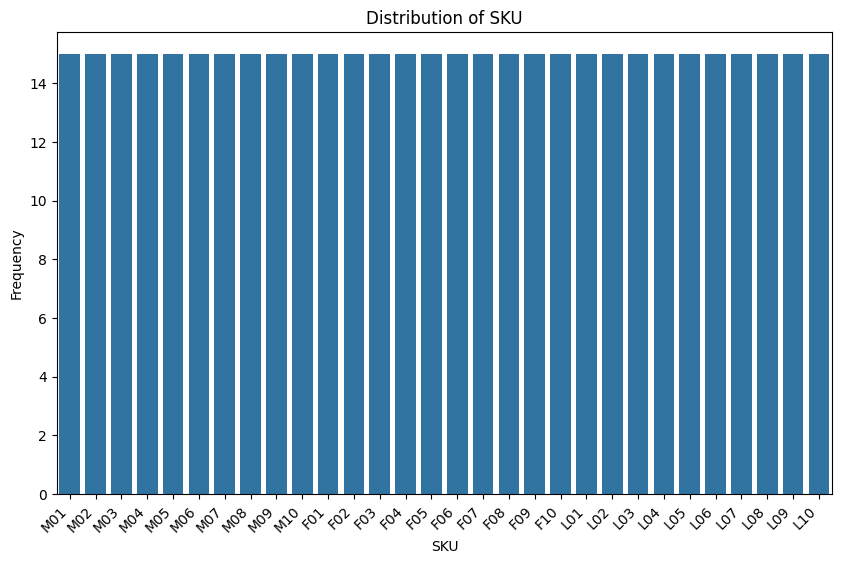

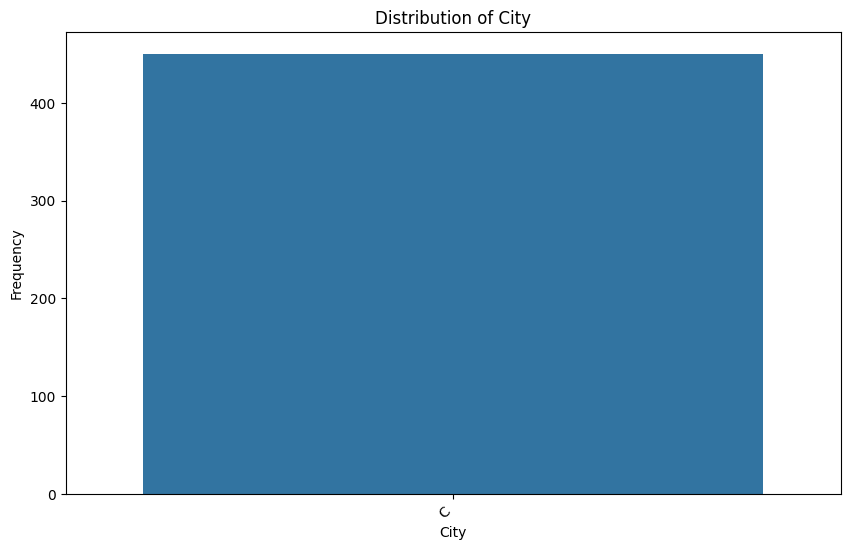

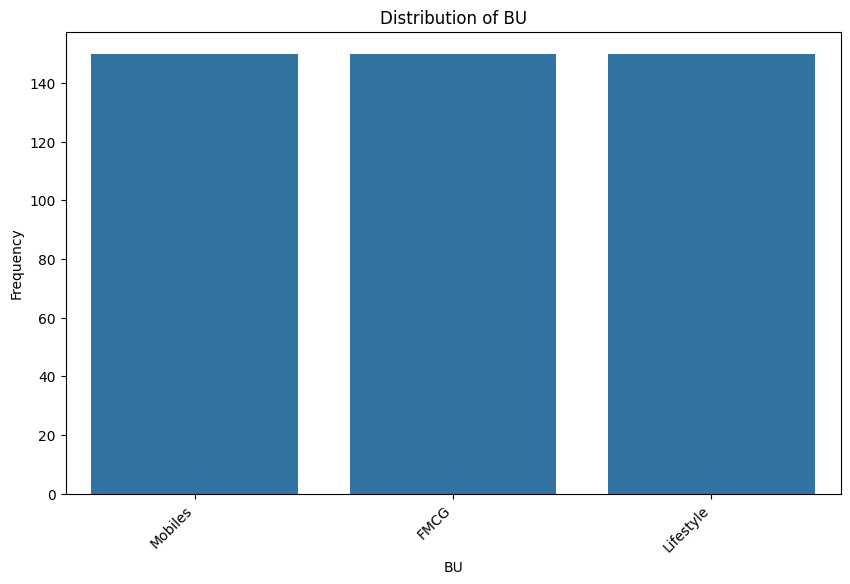

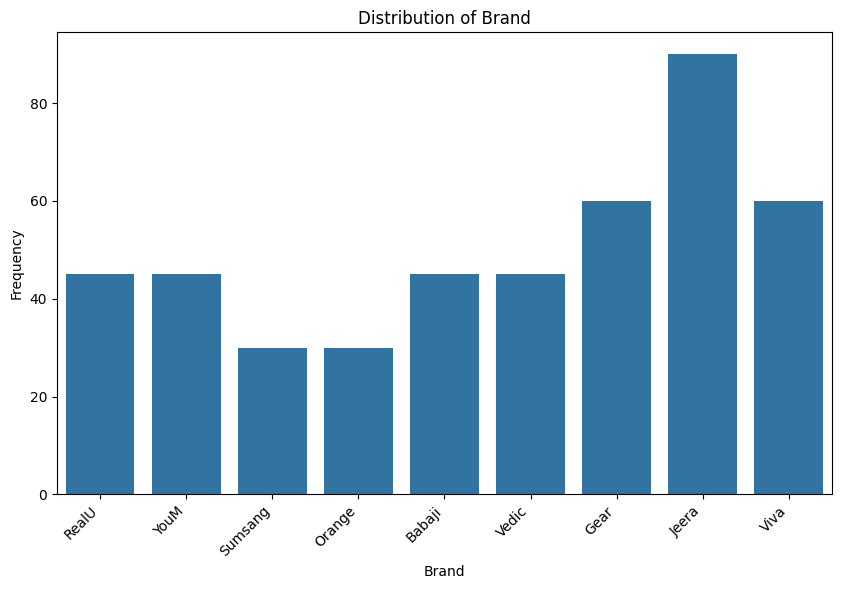

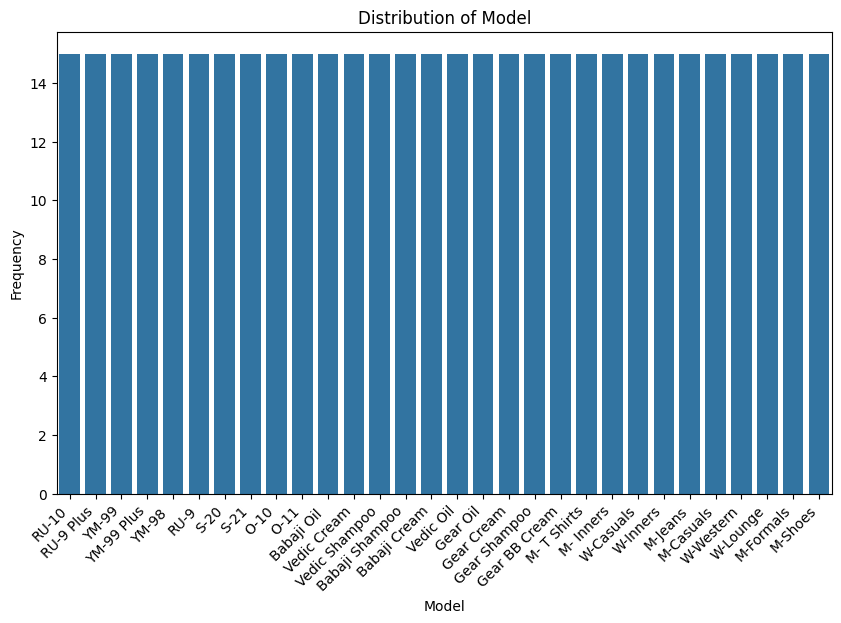

In [32]:
# Create bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [33]:
# Standardize numerical features
for col in numerical_columns:
    df[col + '_zscore'] = (df[col] - df[col].mean()) / df[col].std()

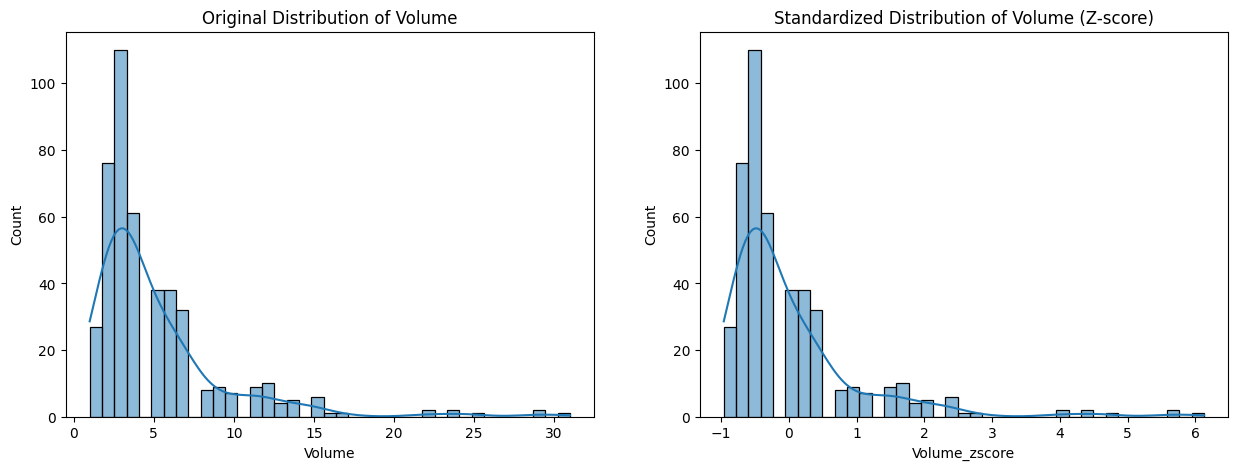

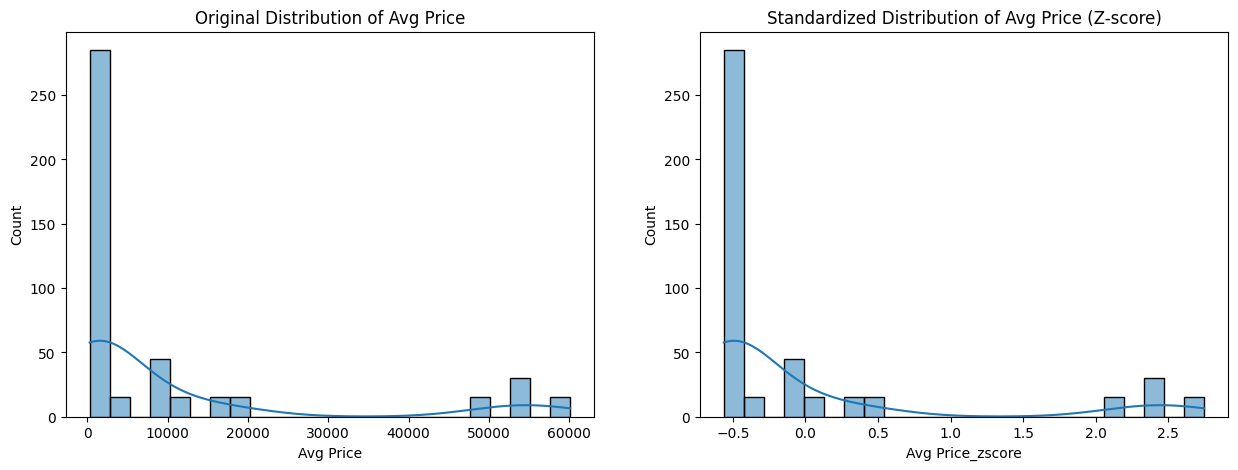

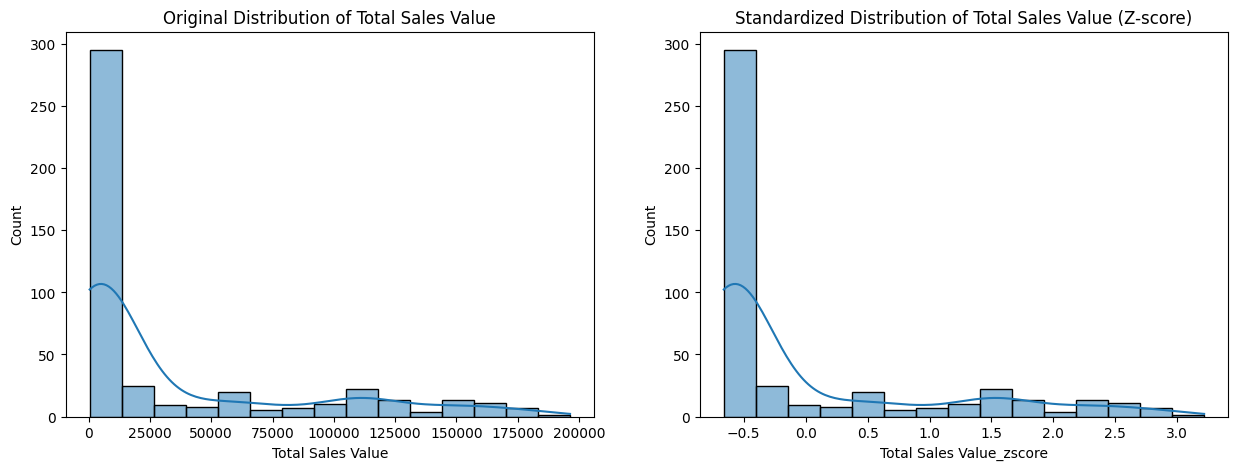

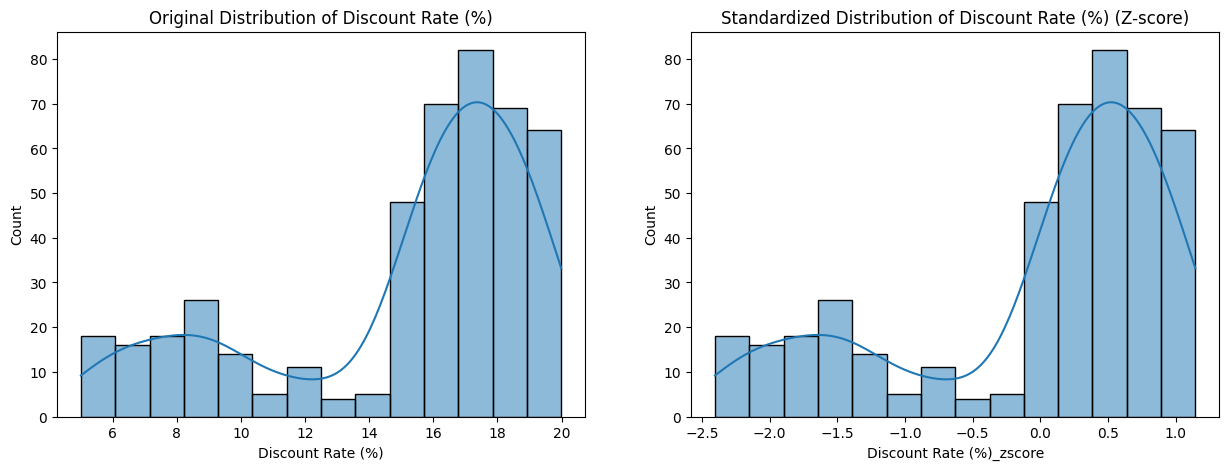

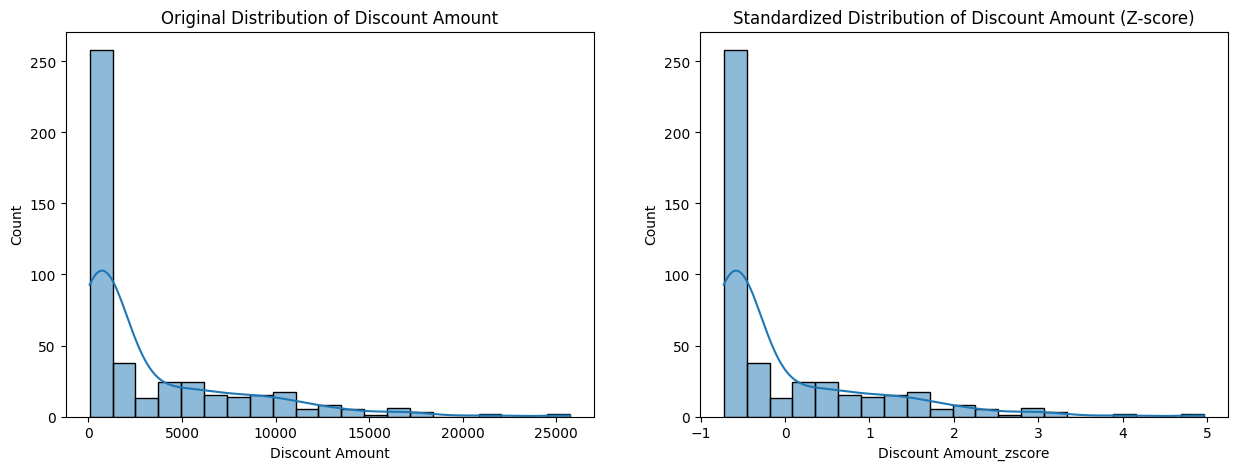

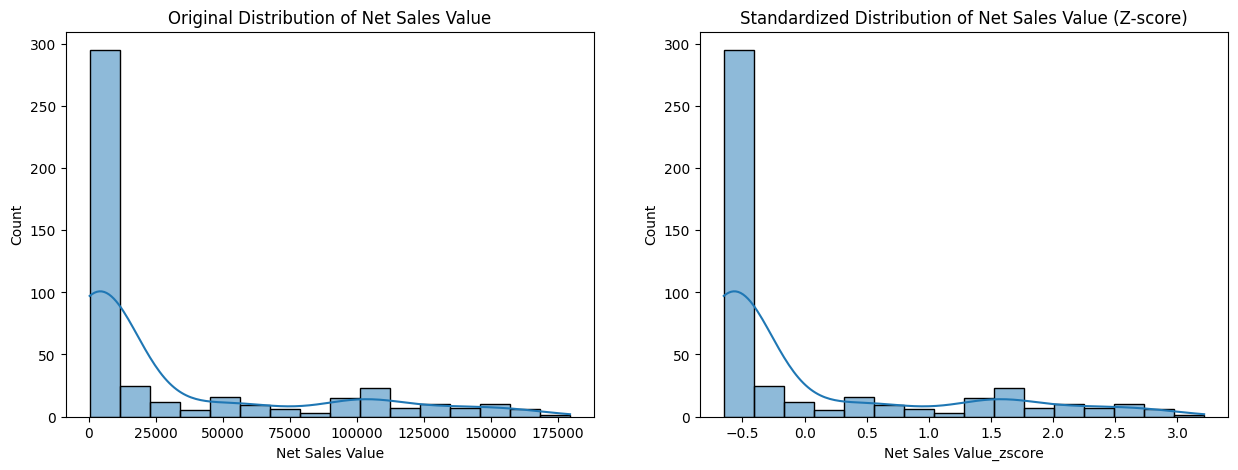

In [34]:
for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Original Distribution of {col}')

    # Standardized distribution
    sns.histplot(df[col + '_zscore'], kde=True, ax=axes[1])
    axes[1].set_title(f'Standardized Distribution of {col} (Z-score)')

    plt.show()

In [35]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Discuss the need for one-hot encoding
print("Categorical columns:", categorical_columns.columns.tolist())
print("\nMany machine learning algorithms cannot directly work with categorical data.")
print("One-hot encoding converts categorical features into numerical representations")
print("by creating new binary columns for each category.")
print("This avoids implying ordinal relationships between categories.")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns.columns, drop_first=True)

# Display a portion of the transformed dataset
print("\nTransformed dataset (first 5 rows):\n")
print(df_encoded.head())


Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

Many machine learning algorithms cannot directly work with categorical data.
One-hot encoding converts categorical features into numerical representations
by creating new binary columns for each category.
This avoids implying ordinal relationships between categories.

Transformed dataset (first 5 rows):

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Volume_zscore  Avg Price_zscore  Total Sales Value_zscore  \
0    160346.501180       2.347417          0.091072          